<a href="https://colab.research.google.com/github/AnandaFachriReynaldi/UAS-AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dibuat oleh : **Ananda Fachri Reynaldi**


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fdata="https://raw.githubusercontent.com/AnandaFachriReynaldi/UAS-AI/refs/heads/main/Dataset/Obesity_Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [4]:
#Cek Data yang missing value/kosong/null/NA/NaN
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
X = df.drop("Gender", axis=1)
Y = df["Gender"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=12)
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")
lbl_encoder = LabelEncoder()
Y_train_enc = lbl_encoder.fit_transform(Y_train)
Y_test_enc = lbl_encoder.transform(Y_test)
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])
scl = StandardScaler()
X_train_scl = scl.fit_transform(X_train_numeric)
X_test_scl = scl.transform(X_test_numeric)
print(f"Data Latih setelah standarisasi:\n{X_train_scl[:5]}")
print(f"Data Uji setelah standarisasi:\n{X_test_scl[:5]}")
print(f"Label Latih setelah encoding:\n{Y_train_enc[:5]}")
print(f"Label Uji setelah encoding:\n{Y_test_enc[:5]}")

Jumlah data latih: 86
Jumlah data uji: 22
Data Latih setelah standarisasi:
[[-1.37176353  0.16075968  1.17062223  1.36863803  1.3847924 ]
 [ 0.42558868 -1.07207253 -0.27014359 -1.00235505 -0.92429493]
 [ 1.11185044  0.16075968 -1.35071796 -0.66364175 -0.48569734]
 [ 0.91577565 -1.16013198 -0.27014359 -1.34106835 -1.56929139]
 [ 0.29487216  0.29284885 -1.35071796  0.18314149  0.28829842]]
Data Uji setelah standarisasi:
[[-1.50248005 -0.71983476  0.45023932  0.69121144  0.62369658]
 [-0.06459828  2.31821606  1.17062223  1.19928139  0.84299538]
 [-1.69855484  0.46896774  1.17062223  1.70735133  1.77179028]
 [ 1.01381305 -0.49968615  0.81043077 -0.66364175 -0.48569734]
 [-1.11033048  1.70179995 -0.63033505 -0.32492845 -0.05999967]]
Label Latih setelah encoding:
[1 0 0 0 0]
Label Uji setelah encoding:
[1 1 1 1 0]


In [8]:
X_train

,ID,Age,Height,Weight,BMI,Label
16,17,48,200,100,31.2,Obese
69,72,20,160,30,13.3,Underweight
90,93,48,130,40,16.7,Underweight
84,87,18,160,20,8.3,Underweight
65,68,51,130,65,22.7,Normal Weight
...,...,...,...,...,...,...
19,21,63,120,30,13.3,Underweight
64,67,46,200,85,26.1,Overweight
35,38,54,130,85,27.5,Overweight
99,102,42,200,30,13.3,Underweight


In [9]:
X_train_scl

array([[-1.37176353e+00,  1.60759683e-01,  1.17062223e+00,
         1.36863803e+00,  1.38479240e+00],
       [ 4.25588685e-01, -1.07207253e+00, -2.70143591e-01,
        -1.00235505e+00, -9.24294930e-01],
       [ 1.11185044e+00,  1.60759683e-01, -1.35071796e+00,
        -6.63641752e-01, -4.85697336e-01],
       [ 9.15775652e-01, -1.16013198e+00, -2.70143591e-01,
        -1.34106835e+00, -1.56929139e+00],
       [ 2.94872160e-01,  2.92848849e-01, -1.35071796e+00,
         1.83141492e-01,  2.88298419e-01],
       [ 7.85059128e-01, -8.95953646e-01,  4.50239319e-01,
        -4.94285103e-01, -2.27698751e-01],
       [ 1.27524610e+00, -9.84013090e-01,  4.50239319e-01,
        -1.34106835e+00, -1.56929139e+00],
       [ 5.56305210e-01, -1.91478093e-01, -9.90526501e-01,
        -3.24928454e-01, -5.99996709e-02],
       [ 6.21663472e-01,  2.48819127e-01, -1.35071796e+00,
         1.37848435e-02,  2.62498560e-01],
       [-1.63319658e+00,  9.09264957e-01,  1.53081368e+00,
         2.04606463e+00

In [10]:
Y_train

,Gender
16,Male
69,Female
90,Female
84,Female
65,Female
...,...
19,Female
64,Male
35,Female
99,Male


In [11]:
Y_train_enc

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scl, Y_train_enc)

KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
knn_predictions = knn_classifier.predict(X_test_scl)

knn_accuracy = accuracy_score(Y_test_enc, knn_predictions)
print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 1.00


In [16]:
cm=confusion_matrix(Y_test_enc,knn_predictions)

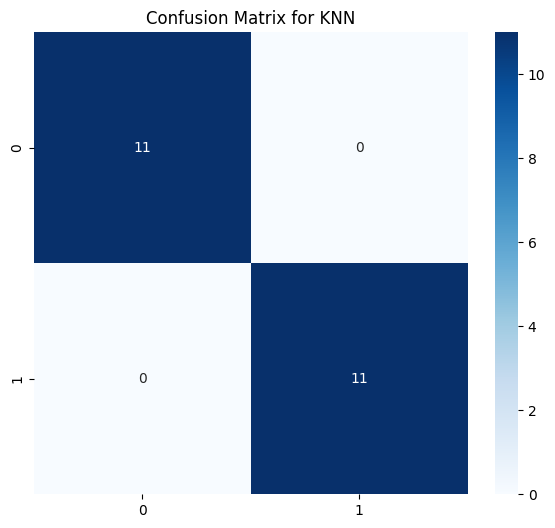

In [17]:
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,X_train_scl,Y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[1.         0.94117647 0.94117647 1.         0.88235294]
Rata score dengan 5 fold : 0.9529411764705882


In [20]:
n_ = range(1, 51, 2)
train, test = [], []
for n in n_:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scl, Y_train_enc)
  train.append(knn.score(X_train_scl, Y_train_enc))
  test.append(knn.score(X_test_scl, Y_test_enc))
print("Skor Akurasi Data Latih:", train)
print("Skor Akurasi Data Uji:", test)

Skor Akurasi Data Latih: [1.0, 0.9883720930232558, 0.9883720930232558, 1.0, 1.0, 0.9767441860465116, 0.9767441860465116, 0.9534883720930233, 0.9534883720930233, 0.9767441860465116, 0.9418604651162791, 0.9534883720930233, 0.9534883720930233, 0.9418604651162791, 0.9302325581395349, 0.9186046511627907, 0.9069767441860465, 0.9186046511627907, 0.9069767441860465, 0.8953488372093024, 0.9069767441860465, 0.9069767441860465, 0.8953488372093024, 0.9069767441860465, 0.9069767441860465]
Skor Akurasi Data Uji: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9090909090909091, 1.0, 0.9545454545454546, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546]


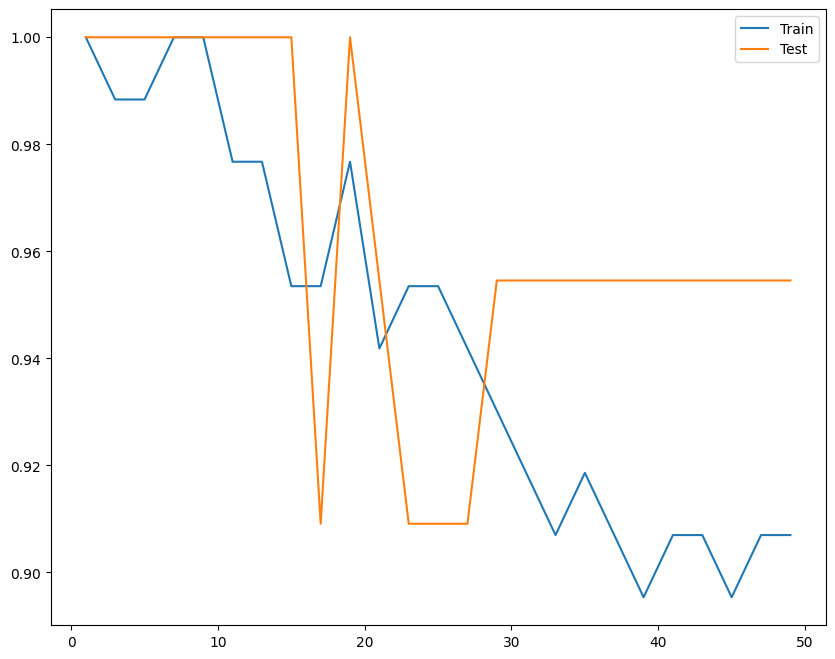

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(n_, train, label='Train')
plt.plot(n_, test, label='Test')
plt.legend()
plt.show()

In [22]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 1.0
K Neighboard terbaik adalah 1
